# Oscillator-to-Oscillator Quantum Error Correction
Notebook to play around with oscillator-to-oscillator (O2O) codes. We will be mainly working from Refs. [1](https://arxiv.org/abs/2308.02913)[2](https://arxiv.org/abs/1903.12615)[3](https://arxiv.org/abs/2212.11970v3)[4](https://arxiv.org/abs/2211.05714).


Oscillator-into-oscillator codes are bosonic codes with an infinite-dimensional logical subspace.

In [7]:
import sys
import os

# Add the directory two levels up for accessing `c2qa` and similar modules
two_up_path = os.path.abspath(os.path.join('..', '..'))
if two_up_path not in sys.path:
    sys.path.append(two_up_path)

# Add the parent directory for accessing sibling directories like `GKP`
one_up_path = os.path.abspath("..")
if one_up_path not in sys.path:
    sys.path.append(one_up_path)

# Now import modules
from GKP.GKP_functions import *
import c2qa
import qiskit
import numpy as np
import c2qa.util as util
import matplotlib.pyplot as plt
import matplotlib

### GKP-Stabilizer Codes
GKP codes defined on $ n $ modes with $ 2n $ stabilizer generators create a finite-dimensional logical subspace. However, by removing some stabilizers, the logical dimension becomes infinite while retaining some error protection.

One example is a two-mode GKP repetition code, generated by square-lattice stabilizers supported only on the second mode. The joint $ +1 $-eigenspace of this group is spanned by any state on the first mode (since no stabilizers act on it) and the canonical GKP state on the second mode. The canonical GKP state (see GKP_intro notebook) is defined as:

$$
|0\rangle_{\text{qunaught}} \propto \sum_{n \in Z} |\hat{q} = n\sqrt{2 \pi}\rangle \propto \sum_{n \in Z} |\hat{p} = n\sqrt{2 \pi}\rangle
$$

with stabilizer generators \( e^{i \sqrt{2\pi} \hat{x}_2} \) and \( e^{-i \sqrt{2\pi} \hat{p}_2} \).

This approach exemplifies how modifying the stabilizer group allows for a balance between dimensionality and error-protection capabilities.


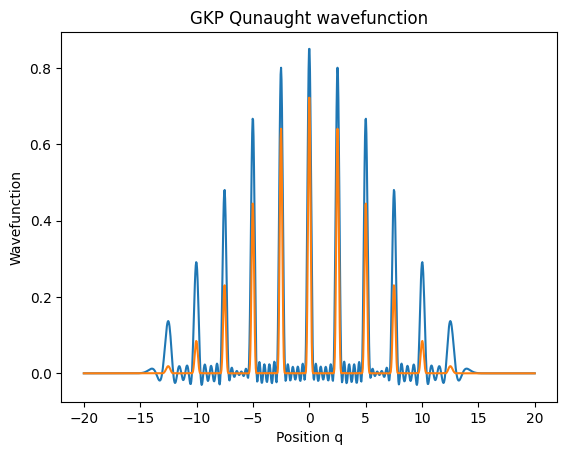

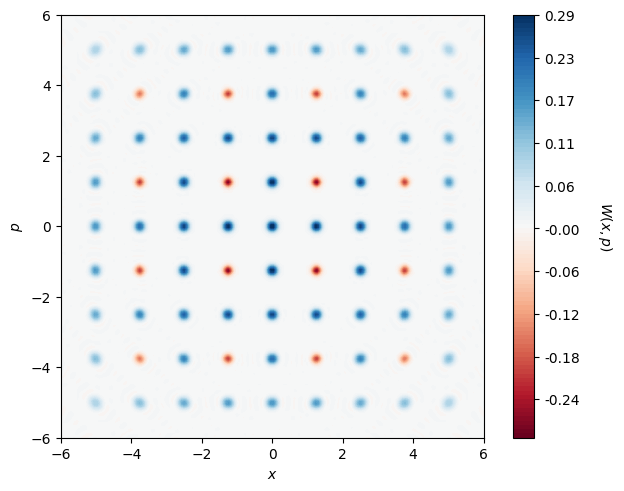

In [8]:
# Define the q value
q = np.linspace(-20, 20, 1000)
eps =  0.019

# Generate the GKP state and coefficients
qunaught, qunaught_coeffs = qunaught_fock(eps, q, norm = True)

#plot the qunaught wavefunction
plt.plot(q, qunaught)
plt.plot(q, np.abs(qunaught)**2)
plt.title(f'GKP Qunaught wavefunction')
plt.xlabel('Position q')
plt.ylabel('Wavefunction')
plt.show()


# #Initialize circuit
qmr = c2qa.QumodeRegister(
    num_qumodes=1,
    num_qubits_per_qumode=7) #qumode
qbr = qiskit.QuantumRegister(1) #qubit
cr = qiskit.ClassicalRegister(1) #readout bit
qunaught_circuit = c2qa.CVCircuit(qmr, qbr, cr) #create circuit

qunaught_circuit.cv_initialize(list(qunaught_coeffs), qmr[0]) #initialize gkp |0> state
qunaught_circuit.h(qbr[0]) # Intialize qubit in |+>


state,_,_ = c2qa.wigner.simulate(qunaught_circuit)
plot = c2qa.wigner.plot_wigner(qunaught_circuit, state)